In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets # This has the Boston dataset
from statsmodels.graphics.regressionplots import abline_plot
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from patsy import dmatrices
from IPython.display import Markdown, display

# Reset all styles to the default:
plt.rcParams.update(plt.rcParamsDefault)
# Then make graphs inline:
%matplotlib inline

# Useful function for Jupyter to display text in bold:
def displaybd(text):
    display(Markdown("**" + text + "**"))

In [2]:
# Set custom style settings:
# NB: We need to separate "matplotlib inline" call and these settings into different
# cells, otherwise the parameters are not set. This is a bug somewhere in Jupyter
plt.rcParams['figure.figsize'] = (7, 6)
plt.rcParams['font.size'] = 24
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'large'
plt.rcParams['lines.markersize'] = 10

# Load Boston data set from sklearn.datasets:
boston = datasets.load_boston()
# Put the target (housing value -- MEDV) in DataFrame
medv = pd.DataFrame(boston.target, columns=["MEDV"])
# Convert the rest of data into DataFrame as well:
boston = pd.DataFrame(boston.data, columns=boston.feature_names)
# Add MEDV to the beginning of boston data frame:
boston.insert(0, 'MEDV', medv["MEDV"])

boston[1:10]

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,28.7,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,22.9,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,27.1,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,16.5,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,18.9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [3]:
# PART 1: A simple linear regression of MEDV on LSTAT 
# (percent of households with low socioeconomic status)

# PART 1.1: Regression results:
model = sm.OLS.from_formula('MEDV~LSTAT', data=boston)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           5.08e-88
Time:                        20:17:56   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**All attributes of the regression result class:**

['HC0_se', 'HC1_se', 'HC2_se', 'HC3_se', 'aic', 'bic', 'bse', 'centered_tss', 'compare_f_test', 'compare_lm_test', 'compare_lr_test', 'condition_number', 'conf_int', 'conf_int_el', 'cov_HC0', 'cov_HC1', 'cov_HC2', 'cov_HC3', 'cov_kwds', 'cov_params', 'cov_type', 'df_model', 'df_resid', 'diagn', 'eigenvals', 'el_test', 'ess', 'f_pvalue', 'f_test', 'fittedvalues', 'fvalue', 'get_influence', 'get_prediction', 'get_robustcov_results', 'initialize', 'k_constant', 'llf', 'load', 'model', 'mse_model', 'mse_resid', 'mse_total', 'nobs', 'normalized_cov_params', 'outlier_test', 'params', 'predict', 'pvalues', 'remove_data', 'resid', 'resid_pearson', 'rsquared', 'rsquared_adj', 'save', 'scale', 'ssr', 'summary', 'summary2', 't_test', 't_test_pairwise', 'tvalues', 'uncentered_tss', 'use_t', 'wald_test', 'wald_test_terms', 'wresid']


***

**Estimated coefficients:**

Intercept    34.553841
LSTAT        -0.950049
dtype: float64


***

**Confidence intervals:**

,0,1
Intercept,33.448457,35.659225
LSTAT,-1.026148,-0.873951


***

**Predicted values with their confidence and prediction intervals:**

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.530062,30.077127,25.599193,34.007996
1,25.053347,0.294814,24.854355,25.252340,20.853137,29.253558
2,20.303101,0.290893,20.106754,20.499447,16.103014,24.503187


***

**Linear regression fit:**

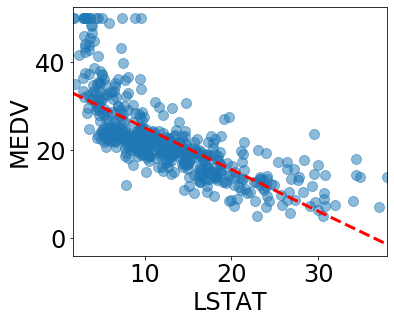

In [4]:
# PART 1.2: Different parts of the regression result object and the linear fit plot:

# The result class has a large number of attributes which can be listed using dir:
displaybd("All attributes of the regression result class:")
print(sorted([v for v in dir(res) if not v.startswith('_')]))

# We can look at the estimated coefficients:
# Note that res.params has pandas Series data type and its elements can be accessed via
# res.params.Intercept and res.params.LSTAT
display(Markdown("***"))
Markdown("**Estimated coefficients:**")
displaybd("Estimated coefficients:")
print(res.params)

# We can look at the 95% confidence interval for all variables:
display(Markdown("***"))
displaybd("Confidence intervals:")
# alpha is the level of the confidence interval
display(res.conf_int(alpha=0.05))

# We can predict out-of-sample MEDV with its 95% confidence and prediction intervals:
# Confidence intervals are mean_ci_lower and mean_ci_upper
# Prediction intevals are obs_ci_lower and obs_ci_upper
prediction = res.get_prediction(exog=dict(LSTAT=[5, 10, 15]))
display(Markdown("***"))
displaybd("Predicted values with their confidence and prediction intervals:")
display(prediction.summary_frame(alpha=0.5))

# We can do the plot of the original data along with the fitted line:
display(Markdown("***"))
displaybd("Linear regression fit:")
fig = sm.graphics.abline_plot(model_results=res, linestyle="--", color="red", linewidth=3)
fig.set_figwidth(6)
fig.set_figheight(5)

ax = fig.axes[0]
ax.scatter(x=boston["LSTAT"], y=boston["MEDV"], alpha=0.5)
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.tight_layout()

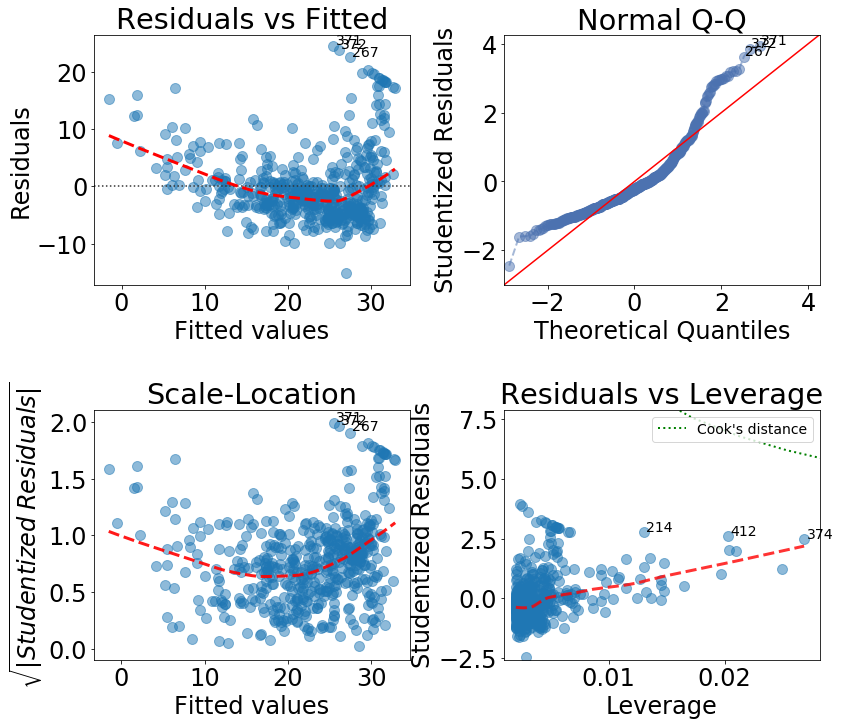

In [5]:
# PART 1.3: Diagnostic plots
# Based on https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034

yhat = res.fittedvalues
ehat = res.resid
# Studentized residuals
ehatStudentized = res.get_influence().resid_studentized_internal
# Asolute squared studentized residuals
ehatStudentizedAbsSqrt = np.sqrt(np.abs(ehatStudentized))
# absolute residuals
ehatAbs = np.abs(ehat)
# leverage:
xleverage = res.get_influence().hat_matrix_diag
# Cook's distance:
modelCooks = res.get_influence().cooks_distance[0]

fig = plt.figure(figsize=[13, 11.5])
plt.subplots_adjust(wspace=0.3, hspace=0.5)

#-- RESIDUAL PLOT:

ax = fig.add_subplot(2, 2, 1)
sns.residplot(yhat, 'MEDV', data=boston, lowess=True, ax=ax,
              scatter_kws={'alpha': 0.5}, 
              line_kws={'color': 'red', 'lw': 3, 'ls': '--', 'alpha': 1.0})
ax.set_title('Residuals vs Fitted')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')

# Annotations for the largest residuals:
yPointsTop3 = ehatAbs.sort_values(ascending=False)[:3]
for i in yPointsTop3.index:
    ax.annotate(i, xy=(1.01*yhat[i], 1.01*ehat[i]), fontsize=14);
    
#-- QQ PLOT:
# This one shows how well the distribution of residuals fit the normal distribution.
# This plots the standardized (z-score) residuals against the theoretical normal quantiles.
# Anything quite off the diagonal lines may be a concern for further investigation.

ax = fig.add_subplot(2, 2, 2)
QQ = ProbPlot(data=ehatStudentized, fit=True)
QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=2, ls="--", ax=ax)
ax.set_title('Normal Q-Q')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Studentized Residuals');

# Annotations for the largest residuals:
yPointsTop3 = np.flip(np.argsort(np.abs(ehatStudentized)), 0)[:3]
for r, i in enumerate(yPointsTop3):
    xy = (1.01 * np.flip(QQ.theoretical_quantiles, 0)[r], 1.01 * ehatStudentized[i])
    ax.annotate(i, xy=xy, fontsize=14);
    
#-- SCALE-LOCATION PLOT:

ax = fig.add_subplot(2, 2, 3)
plt.scatter(yhat, ehatStudentizedAbsSqrt, alpha=0.5)
sns.regplot(yhat, ehatStudentizedAbsSqrt, scatter=False, ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 3, 'ls':'--', 'alpha': 0.9},
            ax=ax)

ax.set_title('Scale-Location')
ax.set_xlabel('Fitted values')
ax.set_ylabel('$\sqrt{|Studentized\; Residuals|}$');

# Annotations for the largest residuals:
yPointsTop3 = np.flip(np.argsort(ehatStudentizedAbsSqrt), 0)[:3]
for i in yPointsTop3:
    ax.annotate(i, xy=(1.01*yhat[i], 1.01*ehatStudentizedAbsSqrt[i]), fontsize=14);

#-- LEVERAGE PLOT:
# This plot shows if any outliers have influence over the regression fit.
# Anything outside the group and outside “Cook’s Distance” lines, may have
# an influential effect on model fit.

ax = fig.add_subplot(2, 2, 4)
plt.scatter(xleverage, ehatStudentized, alpha=0.5)
sns.regplot(xleverage, ehatStudentized, scatter=False, 
            ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 3, 'ls':'--', 'alpha': 0.8},
            ax = ax);
ax.set_xlim(np.min(xleverage) - 0.001, 1.05*np.max(xleverage))
ax.set_ylim(1.05*np.min(ehatStudentized), 2*np.max(ehatStudentized))
ax.set_title('Residuals vs Leverage')
ax.set_xlabel('Leverage')
ax.set_ylabel('Studentized Residuals')

# Annotations for the points with the largest Cook's distance:
yPointsTop3 = np.flip(np.argsort(modelCooks), 0)[:3]
for i in yPointsTop3:
    ax.annotate(i, xy=(1.01*xleverage[i], 1.01*ehatStudentized[i]), fontsize=14)
    
# Shenanigans for Cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=2, ls=':', color='green')

pnum = len(res.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * pnum * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * pnum * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right', fontsize=14);

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           2.98e-88
Time:                        20:17:58   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
LSTAT         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
AGE            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***

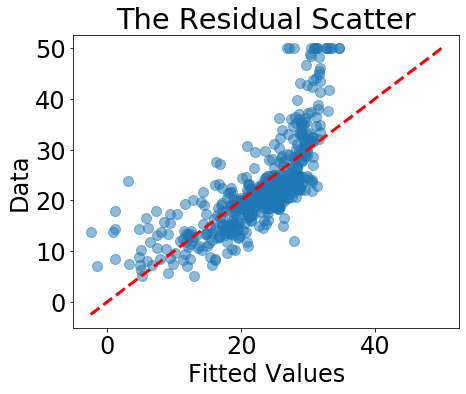

In [6]:
# PART 2: Multiple Linear Regression

# PART 2.1: Regression of MEDV on LSTAT and AGE:
model = sm.OLS.from_formula('MEDV~LSTAT+AGE', data=boston)
res = model.fit()
display(res.summary())

# We can do the plot of the original data along with the fitted line:
display(Markdown("***"))
minval = np.min([np.min(res.fittedvalues), np.min(res.model.endog)])
maxval = np.max([np.max(res.fittedvalues), np.max(res.model.endog)])
plt.scatter(x=res.fittedvalues, y=res.model.endog, alpha=0.5)
# Draw the 45-degree line:
plt.plot([minval, maxval], [minval, maxval], linestyle="--", color="red", linewidth=3)
plt.title('The Residual Scatter')
plt.xlabel('Fitted Values')
plt.ylabel('Data')
plt.tight_layout()

In [7]:
#----
displaybd("Breusch-Pagan Test for Heteroskedasticity:")

# COMMENT: The resutl of the Breusch-Pagan test for heteroskedasticity is either the
# Lagrange multiplier statistics or the F-statistics. Both are valid statistics.
# We need to look at the p-values associated with them. If p-values are small, then
# we reject the null hypothesis of homoskedasticity.
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
bp_test = het_breuschpagan(res.resid, res.model.exog)
print(lzip(name, bp_test))

#----
displaybd("White Test for Heteroskedasticity:")

# COMMENT: The same comments as above for the Breusch-Pagan test apply for the White
# test as well. In addition to that, note that the White test requires wquares and
# interaction terms of the exogenous variables. However, when running het_white(...),
# we only need to supply the exogenous variables. Squares and interaction terms are
# automatically included in the auxiliary regression.
white_test = het_white(res.resid, res.model.exog)
print(lzip(name, white_test))

**Breusch-Pagan Test for Heteroskedasticity:**

[('Lagrange multiplier statistic', 19.69360282066549), ('p-value', 5.291617975761865e-05), ('f-value', 10.184815865317274), ('f p-value', 4.613235608694177e-05)]


**White Test for Heteroskedasticity:**

[('Lagrange multiplier statistic', 149.4021058338797), ('p-value', 1.789739824974063e-30), ('f-value', 41.896519378850016), ('f p-value', 4.955366540379044e-36)]


In [8]:
# PART 2.2: Regression of MEDV on LSTAT and AGE with
# heteroskedasticity-robust standard errors

model = sm.OLS.from_formula('MEDV~LSTAT+AGE', data=boston)
# Using the option cov_type='HC0' will use White’s
# heteroskedasticity-robust standard errors:
res = model.fit(cov_type='HC0')
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     201.3
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           5.96e-65
Time:                        20:17:58   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.727     45.678      0.000      31.797      34.648
LSTAT         -1.0321      0.077    -13.357      0.000      -1.184      -0.881
AGE            0.0345      0.017      2.052      0.040       0.002       0.068
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
"""

In [9]:
# PART 2.3: Regression of MEDV on all predictors

# Construct a sum of all columns:
allColumns = boston.columns.tolist()
allColumns.remove("MEDV")
allColumns = "+".join(allColumns)
model = sm.OLS.from_formula('MEDV~' + allColumns, data=boston)
res = model.fit(cov_type='HC0')
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     94.19
Date:                Thu, 03 Jun 2021   Prob (F-statistic):          2.66e-124
Time:                        20:17:58   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:                  HC0                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      7.890      4.621      0.000      20.996      51.923
CRIM          -0.1080      0.029     -3.784      0.000      -0.164      -0.052
ZN             0.0464      0.014      3.420      0.001       0.020       0.073
INDUS          0.0206      0.050      0.414      0.679      -0.077       0.118
CHAS           2.6867      1.276      2.106      0.035       0.186       5.187
NOX          -17.7666      3.733     -4.759      0.000     -25.083     -10.450
RM             3.8099      0.833      4.573      0.000       2.177       5.443
AGE            0.0007      0.016      0.043      0.966      -0.031       0.033
DIS           -1.4756      0.212     -6.969      0.000      -1.891      -1.061
RAD            0.3060      0.061      5.052      0.000       0.187       0.425
TAX           -0.0123      0.003     -4.649      0.000      -0.018      -0.007
PTRATIO       -0.9527      0.116     -8.227      0.000      -1.180      -0.726
B              0.0093      0.003      3.525      0.000       0.004       0.014
LSTAT         -0.5248      0.098     -5.340      0.000      -0.717      -0.332
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC0)
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
# PART 2.4: Variance Inflation Factors (VIF)

# Get Y and X dataframes based on the full regression:
# NB: We need to explicitly include the constant here:
Y, X = dmatrices('MEDV ~ ' + allColumns, data=boston, return_type='dataframe')
# Calculate VIFs for all columns:
vif = pd.DataFrame()
# We don't calculate VIF for the column with index '0', because this is the Intercept column:
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
vif["features"] = X.columns[1:]
vif.round(2)

,VIF Factor,features
0,1.79,CRIM
1,2.30,ZN
2,3.99,INDUS
3,1.07,CHAS
4,4.39,NOX
5,1.93,RM
6,3.10,AGE
7,3.96,DIS
8,7.48,RAD
9,9.01,TAX
